### 오늘 학습할 내용

- 이미지를 불러와서 출력하기
- 칼라, gray, 이진 이미지 사용하기
- 이미지 색상 변환
- 동영상 불러와서 출력하기
- 동영상 녹화하기
- 동영상에서 이미지 저장하기
- 이미지들을 동영상으로 저장하기
- 이미지에서 ROI 영역 표시하기
- HSV 색상공간으로 이용해서 색상 추출하기
- 이미지에서 얼굴 / 눈 영역 추출하기
- 동영상에서 얼굴 / 눈 영역 추출하기
- 텍스트를 음성으로 변환
- 음성을 텍스트로 변환
- 팀별로 프로젝트에 필요한 기술을 확인

- 1. 이미지를 불러와서 출력하기

- OpenCV

- 이미지 처리 전용 라이브러리
- C++로 제작
- C++, Java, Javascript, Android, Python 등에서 활용
- Matplotlib, Numpy, Scipy 등의 라이브러리와 호환

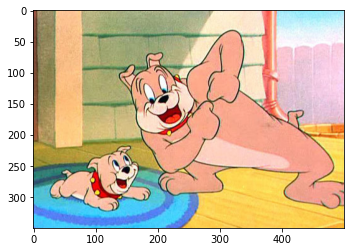

In [24]:
# opencv 설치 확인
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./Image/gaekgaek.jpg",cv2.IMREAD_COLOR)

# 파이썬은 색상공간은 BGR을 사용하고 실제 이미지들은 RGB이므로 변환 필요
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.imshow(img)

### 시각은 색상정보에 대해 잘못된 정보를 보내주는 경우가 많음

- 밤에 색상을 볼때 정확한 색상을 보여주지 못함
- 색상에 빛을 강하게 비추는 경우 정확한 색상을 보여주지 못함 (채도(흰색이 섞이는 것))

- 컬러는 너무 많은 정보를 가지고 있기 때문에 연산량이 너무 많음 (실시간 처리가 어려움)

- 따라서 gray 이미지나 binary 이미지로 변환해서 처리

- gray 이미지: 0~255로 된 픽셀로만 구성된 흑백이미지
- 이진 이미지: 0(검정색)과 255(흰색)으로만 구성된 이미지 (마스크 패턴, 필터링)

- 칼라 -> gray 이미지 변환
- imread()로 이미지를 읽을때 변환해서 읽는 방법
- 칼라 이미지로 읽어서 cvtColor() 변환하는 방법
    - 칼라 이미지가 필요한 경우 (출력)

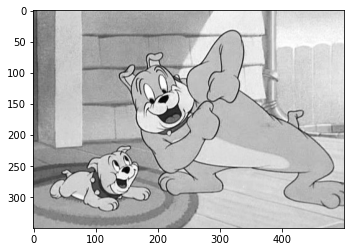

In [25]:
# imread()로 이미지를 읽을때 변환해서 읽는 방법
gray_img = cv2.imread("./Image/gaekgaek.jpg",cv2.IMREAD_GRAYSCALE)

# imshow() : 원래 기본으로 설정 컬러공간이 있으므로 cmap 옵션을 변경
plt.imshow(gray_img, cmap ="gray")

plt.show()

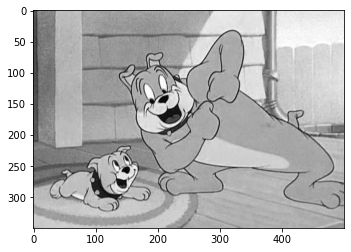

In [26]:
# 칼라 이미지로 읽어서 cvtColor() 변환하는 방법

img = cv2.imread("./Image/gaekgaek.jpg",cv2.IMREAD_COLOR)

# RGB -> gray 이미지로 변환
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)


plt.imshow(img, cmap ="gray")

plt.show()

### 흑백 이미지 -> 이진 이미지

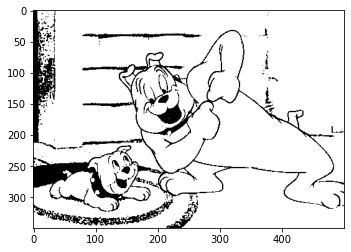

In [27]:
# 이미지, 기준값, 적용값, 옵션
# 반환값: 변환성공여부, 변환한 이미지
# cv2.THRESH_BINARY : 기준값보다 크면 적용값 255를 할당, 그렇지 않으면 0을 할당
# cv2.THRESH_BINARY_INV: 기준값보다 작으면 적용값 255를 할당, 그렇지 않으면 0을 할당
# _ : 첫 번째 반환값은 쓰지 않겠다고 선언
# 결과가 너무 검정색이면 기준값을 작게
# 결과가 너무 하얀색이면 기준값을 크게
_, binary_img = cv2.threshold(gray_img, 130, 260,
                             cv2.THRESH_BINARY)
plt.imshow(binary_img, cmap ="gray")

### 동영상을 불러와서 실행해보기

In [28]:
# 파일을 다룰 때는 예외 처리를 해주는 것이 오류 방지에 좋다
try:
    cap = cv2.VideoCapture("./Image/video.mp4")
    
    # 카메라로부터 직접 비디오를 캡처
    # cap = cv2.VideoCapture(0)
    print("비디오 파일 캡처 성공")
except:
    print("비디오 파일 캡처 실패")

# 캡처된 비디오로부터 프레임 이미지를 읽어와서 출력
# 프레임 이미지 : 동영상에 포함된 이미지들
while True:
    # 캡처된 비디오로부터 이미지를 읽어온다
    # 반환값: 성공여부, 읽은 이미지
    ret, frame = cap.read()
    
    # 잘못 읽은 경우 (False가 반환된 경우)
    # 오류가 있거나 다 읽었거나
    if not ret:
        print("비디오 읽기 실패 / 비디오 모두 읽음")
        cap.release() # 비디오 읽기 종료
        cv2.destroyAllWindows() # 새로 연 창을 모두 닫아줌
        break
        
    # 프레임 이미지를 출력 (타이틀, 프레임이미지)
    cv2.imshow("video", frame)
    
    # 사용자가 임의의 키를 누르면 종료되도록 설정
    # 0이면 사용자가 임의의 키를 누를 때까지 무한정 대기
    # 0이 아닌 숫자를 쓰면 해당시간/1000초만큼 대기
    # 초당 몇 장의 프레임이미지가 출력될까요? -> 30장
    k = cv2.waitKey(33)
    
    if k == 49: # ASCII 코드로 1을 의미
        print("비디오 실행 종료")
        cap.release() 
        cv2.destroyAllWindows() 
        break

비디오 파일 캡처 성공
비디오 실행 종료


### CCTV 만들기 - 동영상 녹화하기

In [29]:
try :
    cap = cv2.VideoCapture("./image/video.mp4")
    # cap = cv2.VideoCapture(0)    
    print("비디오 파일 캡처 성공")
except :
    print("비디오 파일 캡처 실패")

# 녹화설정 (속도, 크기, 코덱)
fps = 30 # 초당 프레임 이미지 수
w = int(cap.get(3))  # 가로 크기
h = int(cap.get(4))  # 세로 크기
# 코덱 설정
codec = cv2.VideoWriter_fourcc(*"DIVX") # avi 형식

# 녹화파일 설정 (파일명, 코덱, 속도, 크기)
out = cv2.VideoWriter("./Image/cctv01.avi", codec, fps, (w,h))

# 녹화가능 여부 설정
record = False

while True :
    ret, frame = cap.read()
    
    if not ret : 
        print("비디오 읽기 실패 / 비디오 모두 읽음")
        cap.release()     
        cv2.destroyAllWindows()   
        break
        
    cv2.imshow("video", frame)
    
    # 녹화하기
    if record:
        out.write(frame)
        
    k = cv2.waitKey(33)
    
    if k == 49 :       
        print("비디오 실행 종료")
        cap.release() 
        out.release()
        cv2.destroyAllWindows()    
        break 
    if k == 50: # 2를 눌렀다면
        record = True
        print("녹화 시작")

비디오 파일 캡처 성공
비디오 실행 종료


### 동영상에서 이미지를 한 장씩 저장하기

In [30]:
## import cv2

try :
    cap = cv2.VideoCapture("./Image/video.mp4")
    #cap = cv2.VideoCapture(0)    
    print("비디오 파일 캡처 성공")
except :
    print("비디오 파일 캡처 실패")
    
co = 0     # 파일명에 숫자을 붙이기 위한 변수    
    
while True :
    ret, frame = cap.read()
    
    if not ret : 
        print("비디오 읽기 실패 / 비디오 모두 읽음")
        cap.release()     
        cv2.destroyAllWindows()   
        break
        
    cv2.imshow("video", frame)

    k = cv2.waitKey(33)
    
    if k == 49 :       
        print("비디오 실행 종료")
        cap.release()     
        cv2.destroyAllWindows()    
        break 
    
    # 2를 누르면 현재 프레임을 저장
    if k == 50 :
        co = co + 1
        print("./image/pic{}.png".format(co), " 파일을 저장하였음")
        # 파일명, 저장할 프레임이미지, 저장옵션 (파일형식)
        # cv2.IMWRITE_PNG_COMPRESSION : png 파일을 압축해서 저장
        # 0 : 압축율 (0-9) - 큰값일수록 압축률이 높음
        cv2.imwrite("./image/pic{}.png".format(co), frame,
                   params=[cv2.IMWRITE_PNG_COMPRESSION, 0])

비디오 파일 캡처 성공
비디오 실행 종료


### 저장된 파일들을 이용해서 다시 동영상으로 만들기

In [31]:
import cv2

# 녹화설정
fps = 1.0 # 1초 1개 이미지만 출력
w = 640
h = 358
codec = cv2.VideoWriter_fourcc(*"DIVX")

out = cv2.VideoWriter("./Image/pic.avi",codec,fps, (w,h))

# 저장된 파일을 하나씩 읽어서 동영상에 추가
for f in range(1,23):
    # 이미지 읽기
    img = cv2.imread("./Image/pic{}.png".format(f), cv2.IMREAD_COLOR)
    
    # 동영상 파일로 저장
    out.write(img)

# 동영상 저장이 끝나면 파일 해제
out.release()

### ROI 영역 표시하기
- ROI (Region of Image) : 관심영역 -> 이미지에 우리가 필요한 부분 (얼굴, 눈 ...)

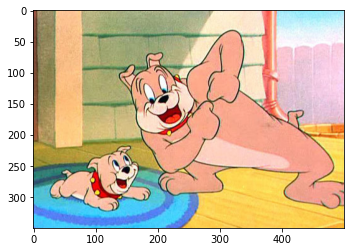

In [32]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./Image/gaekgaek.jpg")
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

plt.imshow(img)

In [33]:
# 가로 세로
# 100 

- 사각형 그리기
    - cv2.rectagle (이미지, 좌상단좌표, 우하단좌표, 색상, 선두께)
    - cv2.puText(이미지, 출력내용, 출력좌표, 폰트, 폰트크기, 색상, 선두께)

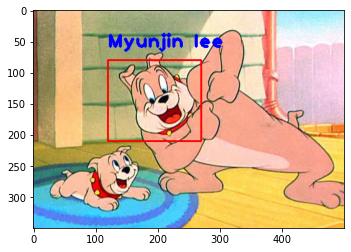

In [34]:
img = cv2.imread("./Image/gaekgaek.jpg")
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

img = cv2.rectangle(img,(120,80), (270,210), (255,0,0),2)
img = cv2.putText(img, "Myunjin lee", (120,60), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255),3)

plt.imshow(img)

이미지에서 얼굴과 눈 찾기
- haarcascade나 diib 라이브러리를 주로 사용
- 구글 얼굴찾는 API, 네이버 클로버 API

In [35]:
# 추출 알고리즘 가져오기
face_ca = cv2.CascadeClassifier("./Image/haarcascade_frontalface_default.xml")
eye_ca = cv2.CascadeClassifier("./Image/haarcascade_eye.xml")

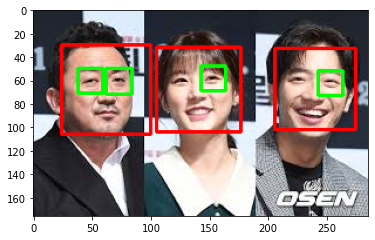

In [36]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./Image/face.png")
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴영역들 추출하기
# 스케일 값 (얼굴영역의 크기), 최소 이웃값 (얼굴영역들간의 거리)
# 반환값: x , y ,w ,h
faces  = face_ca.detectMultiScale(img_gray,1.3,5)

# 추출된 얼굴영역들을 가져온다
for (x,y,w,h) in faces:
    # 얼굴영역을 이미지 표시
    cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2)
    
    # 얼굴 영역에서 눈을 찾는다
    # 얼굴 ROI 영역을 추출
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    # 얼굴영역에서 눈 영역을 검색
    eyes = eye_ca.detectMultiScale(roi_gray, 1.05, 1)
    
    # 눈 영역을 표시
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)
    
plt.imshow(img)
plt.show()

### 색상찾기
- RGB: 채도의 명도 민감
- 색상처리하는 경우는 HSV (색상, 채도, 명도) 변환해서 사용

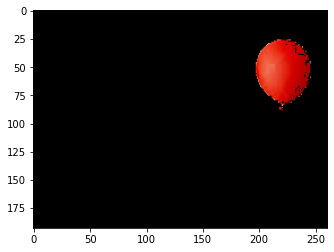

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./Image/ballon.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 빨간색의 색상 범위를 설정 (색상, 채도, 명도)
minValue = np.array([-10,100,100])
maxValue = np.array([10,255,255])

# 빨간색 : -10 ~ 10
# 파란색: 100 ~ 130
# 녹색: 40 ~70
# 노란색: 10 ~ 40


# HSV 색상공간의 마스크 설정
mask = cv2.inRange(hsv, minValue, maxValue)
# 원이미지에서 mask 해당하는 색상부분만 추출
img2 = cv2.bitwise_and(img, img, mask=mask)

img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
plt.imshow(img2)